In [1]:
%matplotlib notebook
%pylab
from exact_r import *

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## First order corrections
The first order flux formulation is given by:

\begin{equation}
Q_{i}^{n+1} = Q_{i}^{n} - \frac{\Delta t}{\Delta x}(\mathcal{A}^{-} \Delta Q_{i+\frac{1}{2}} + \mathcal{A}^{+} \Delta Q_{i-\frac{1}{2}})
\end{equation}

where:
$\mathcal{A}^{\pm} \Delta Q_{i \pm \frac{1}{2}}$ is the fluctuation

## Second order corrections
Second order corrections are defined in terms of waves and speeds.   Waves are defined as the eigenvector decomposition of the jump in Q ($\alpha r $) at the interface. The middle states are obtained from the exact solver (newton solver).   

The $p^{th}$ wave at interface $i$ is given
by $\mathcal{W}^p_{i-1/2} \equiv \alpha_{i-1/2} r^p_{i-1/2}$.  

Also, we need to compute speeds $S^p_{i-1/2} = \lambda^p_{i-1/2}$ which should also be evaluated at middle states. 

The second order flux formulation is given by:

\begin{equation}
Q_{i}^{n+1} = Q_{i}^{n} - \frac{\Delta t}{\Delta x}(\mathcal{A}^{-} \Delta Q_{i+\frac{1}{2}} + \mathcal{A}^{+} \Delta Q_{i-\frac{1}{2}}) - \frac{\Delta t}{\Delta x}( \tilde{F}_{i+\frac{1}{2}} -  \tilde{F}_{i-\frac{1}{2}})
\end{equation}

where:
\begin{equation}
\tilde{F}_{i-\frac{1}{2}} = \frac{1}{2} \sum_{p=1}^{m}|S_{i-\frac{1}{2}}^{p}| (1-\frac{\Delta t}{\Delta x}|S_{i-\frac{1}{2}}^{p}|) \tilde{\mathcal{W}}_{i-\frac{1}{2}}^{p}
\end{equation}

where $\tilde{\mathcal{W}}_{i-\frac{1}{2}}^{p}$ is a limited version of $\mathcal{W}^p_{i-1/2}$, obtained by comparing this jump with the jump $\mathcal{W}^p_{I-1/2}$ in the same family at the neighbouring Riemann problem in the upwind direction, so

\begin{equation*}
I = \left\{\begin{array}{rr} 
i-1 & \text{if} \quad S_{i-\frac{1}{2}}^{p} > 0 \\
i+1 & \text{if} \quad S_{i-\frac{1}{2}}^{p} < 0\\
\end{array}
\right.
\end{equation*}

In [2]:
hl = 2
hr = 1
ul = 0
ur = 0

# Spatial domain
ax = -5
bx = 5
ay = -1
by = 2.5
meqn = 2  # Number of equations in the system

# Gravity
g = 1

# Temporal domain
to = 0
Tfinal = 2

#intial data
ql = array([hl,hl*ul])
qr = array([hr,hr*ur])

cfl = 0.9


## Initial conditions

The solver should supply an initialization routine to initialize  q(x,t)  at time  t=0 .

In [3]:
def h_init(x,hl,hr):    
    q0 = where(x < 0,hl,hr)
    return q0

def hu_init(x,hl,ul,hr,ur):    
    #q0 = zeros(x.shape)  
    q0 = where(x<0,hl*ul,hr*ur)
    return q0

def qinit(x,meqn):
    
    q = zeros((x.shape[0],meqn))
    q[:,0] = h_init(x,hl,hr)
    q[:,1] = hu_init(x,hl,ul,hr,ur)
    
    return q

## Sample test and plot

In [4]:
import wpa_fluct

# mq = 0 : Height field
# mq = 1 : Momentum field

mq = 0

mx = 200

# Estimate maximum wave speed.  Note that this will change with time, so we have to find a 
# maximum that works for t in [0,T]
umax = 1.7
    
# Estimate time step and number of time steps to take
dx = (bx-ax)/mx
dt_est = cfl*dx/umax;
nout = int(floor(Tfinal/dt_est) + 1)
dt = Tfinal/nout

Q,x,tvec = wpa_fluct.wpa_f(ax,bx,mx,mq,meqn,Tfinal,nout,g,\
            newton=newton,\
            second_order=True,\
            qinit = qinit)


<IPython.core.display.Javascript object>


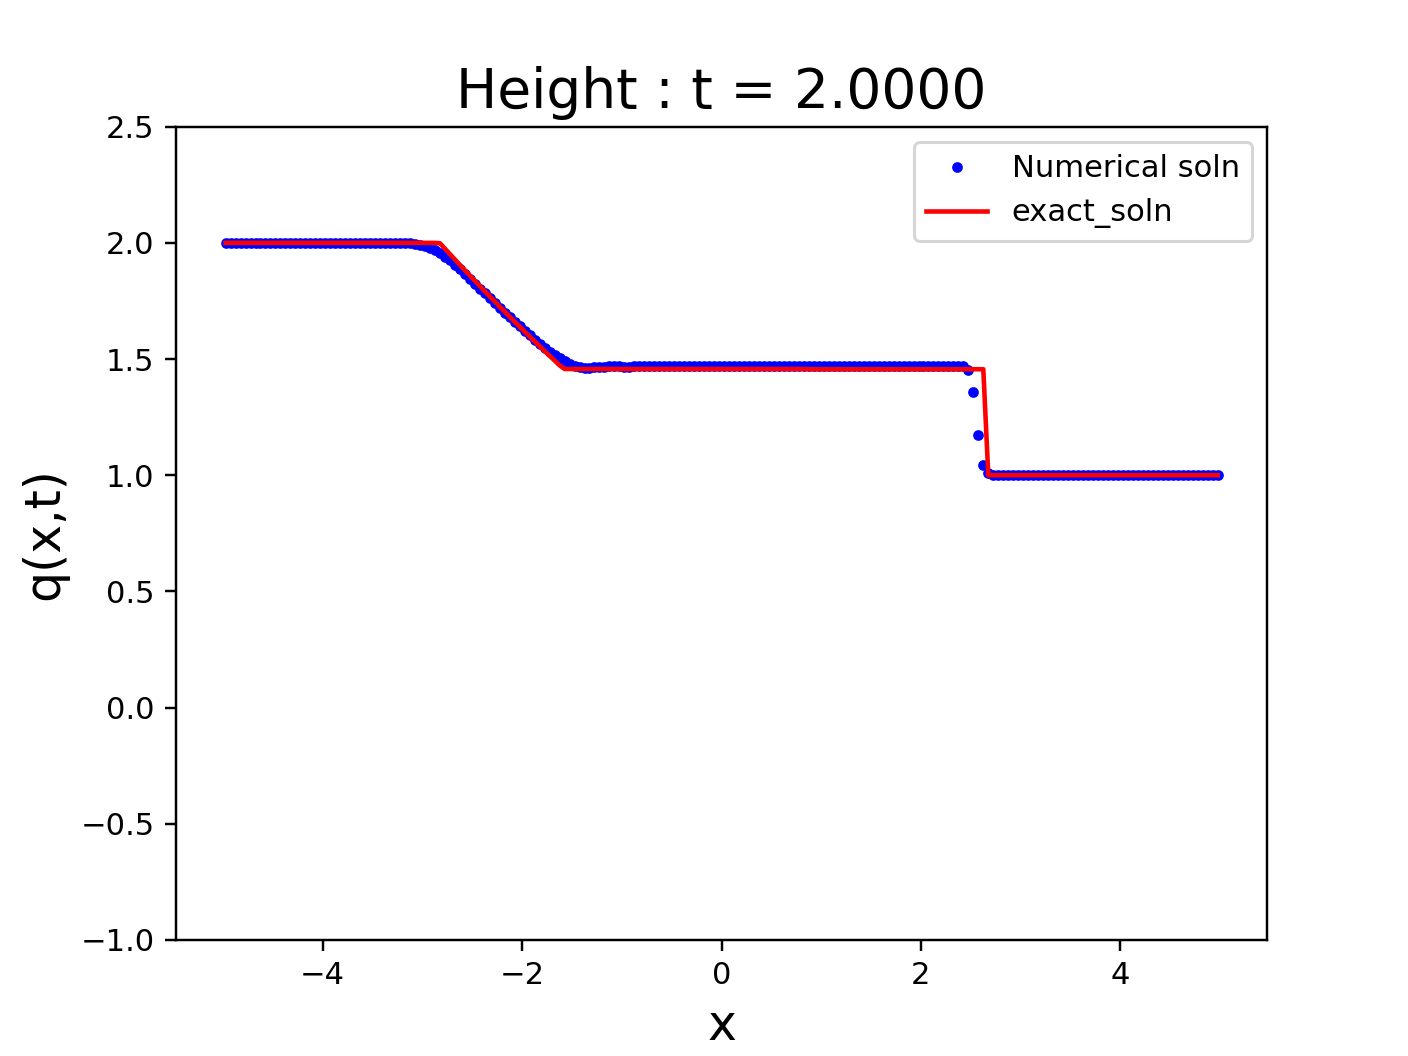

In [5]:
fig = figure(1)
clf()

qo = Q[:,mq,0]

hdl, = plot(x,qo,'b.',markersize=5,label='Numerical soln')

if mq == 0:
    tstr = 'Height : t = {:.4f}'
else:
    tstr = 'Momentum : t = {:.4f}'

htitle = title(tstr.format(0),fontsize=18)

q0 = qexact(x,to,mq,ql,qr,g)

hde, = plot(x,q0,'r-',markersize=5,label='exact_soln')


#Time loop
for n,t in enumerate(tvec):
    
    qe = qexact(x,t,mq,ql,qr,g)
    hde.set_ydata(qe)
    
    q = Q[:,mq,n]
    hdl.set_ydata(q)
    #hdl.set_ydata(q)
    
    xlabel('x',fontsize=16)
    ylabel('q(x,t)',fontsize=16)
    htitle.set_text(tstr.format(t))
    
    ylim([ay,by])
    legend()
    pause(0.1)

    fig.canvas.draw()        